In [1]:
import xarray as xr
import dask
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import glob
import pandas as pd
import os

def spatial_mean(da):
    """Computes the spatial mean if lat and lon dimensions are present."""
    if 'lat' in da.dims and 'lon' in da.dims:
        return da.mean(dim=['lat', 'lon'])
    return da

# Convert cftime.DatetimeNoLeap to numpy.datetime64
def convert_time(ds):
    ds['time'] = [pd.Timestamp(time.strftime()) for time in ds['time'].values]
    return ds


# Plot time series of monthly average
    ## Select either Monethly (h0) daily (h1) or Hourly(h2) using wild card

In [2]:
# Directory where the netCDF files are located
data_directory = '/home/jguo/projects/cesm/archive/case/lnd/hist/'  # Current directory. Adjust this if your files are elsewhere.

# File pattern
# h2 is two years of daily files, each file contains 24 hourly output  
file_pattern = "i.e21.I2000Clm50SpGs.f09_g17.keerZ2year.003.clm2.h2*.nc"

file_path_pattern = os.path.join(data_directory, file_pattern)

In [3]:
# Get the list of files using the pattern
file_list = glob.glob(file_path_pattern)
file_list.sort(key=lambda x: os.path.basename(x).split('.')[-2])


In [4]:
# os.listdir(directory)
file_list

['/home/jguo/projects/cesm/archive/case/lnd/hist/i.e21.I2000Clm50SpGs.f09_g17.keerZ2year.003.clm2.h2.2000-01-01-00000.nc',
 '/home/jguo/projects/cesm/archive/case/lnd/hist/i.e21.I2000Clm50SpGs.f09_g17.keerZ2year.003.clm2.h2.2000-01-02-00000.nc',
 '/home/jguo/projects/cesm/archive/case/lnd/hist/i.e21.I2000Clm50SpGs.f09_g17.keerZ2year.003.clm2.h2.2000-01-03-00000.nc',
 '/home/jguo/projects/cesm/archive/case/lnd/hist/i.e21.I2000Clm50SpGs.f09_g17.keerZ2year.003.clm2.h2.2000-01-04-00000.nc',
 '/home/jguo/projects/cesm/archive/case/lnd/hist/i.e21.I2000Clm50SpGs.f09_g17.keerZ2year.003.clm2.h2.2000-01-05-00000.nc',
 '/home/jguo/projects/cesm/archive/case/lnd/hist/i.e21.I2000Clm50SpGs.f09_g17.keerZ2year.003.clm2.h2.2000-01-06-00000.nc',
 '/home/jguo/projects/cesm/archive/case/lnd/hist/i.e21.I2000Clm50SpGs.f09_g17.keerZ2year.003.clm2.h2.2000-01-07-00000.nc',
 '/home/jguo/projects/cesm/archive/case/lnd/hist/i.e21.I2000Clm50SpGs.f09_g17.keerZ2year.003.clm2.h2.2000-01-08-00000.nc',
 '/home/jguo/pro

In [5]:
# Open the files using Dask and Xarray
ds = xr.open_mfdataset(file_list, combine='by_coords', engine='netcdf4', chunks={'time': 480})
# ds = xr.open_mfdataset(file_list, combine='by_coords', engine='netcdf4')

In [6]:
# Convert the cftime.DatetimeNoLeap objects to pandas Timestamps
ds = convert_time(ds)

In [7]:
ds

<xarray.Dataset>
Dimensions:                (levgrnd: 25, levlak: 10, levdcmp: 1, time: 17521,
                            hist_interval: 2, lon: 288, lat: 192, levsoi: 20)
Coordinates:
  * levgrnd                (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak                 (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                (levdcmp) float32 1.0
  * time                   (time) datetime64[ns] 2000-01-01 ... 2002-01-01
  * lon                    (lon) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lat                    (lat) float32 -90.0 -89.06 -88.12 ... 89.06 90.0
Dimensions without coordinates: hist_interval, levsoi
Data variables: (12/38)
    mcdate                 (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    mcsec                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    mdcur                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    mscur                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    nstep                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    time_bounds            (time, hist_interval) object dask.array<chunksize=(24, 2), meta=np.ndarray>
    ...                     ...
    SOILLIQ                (time, levsoi, lat, lon) float32 dask.array<chunksize=(24, 20, 192, 288), meta=np.ndarray>
    TBOT                   (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
    TG                     (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
    TRAFFICFLUX            (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
    WASTEHEAT              (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
    WIND                   (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 10/14/23 20:56:35
    source:                                    Community Terrestrial Systems ...
    hostname:                                  JohnnyThinkStation
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          hour_1
    Time_constant_3Dvars_filename:             ./i.e21.I2000Clm50SpGs.f09_g17...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

In [8]:
# Monthly average
monthly_avg = ds.resample(time='1M').mean()

In [9]:
monthly_avg

<xarray.Dataset>
Dimensions:                (time: 25, lat: 192, lon: 288, levsoi: 20,
                            levgrnd: 25, levlak: 10, levdcmp: 1)
Coordinates:
  * levgrnd                (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak                 (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                (levdcmp) float32 1.0
  * lon                    (lon) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lat                    (lat) float32 -90.0 -89.06 -88.12 ... 89.06 90.0
  * time                   (time) datetime64[ns] 2000-01-31 ... 2002-01-31
Dimensions without coordinates: levsoi
Data variables: (12/35)
    mcdate                 (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec                  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur                  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur                  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep                  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    area                   (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    ...                     ...
    SOILLIQ                (time, levsoi, lat, lon) float32 dask.array<chunksize=(1, 20, 192, 288), meta=np.ndarray>
    TBOT                   (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    TG                     (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    TRAFFICFLUX            (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    WASTEHEAT              (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    WIND                   (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 10/14/23 20:56:35
    source:                                    Community Terrestrial Systems ...
    hostname:                                  JohnnyThinkStation
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          hour_1
    Time_constant_3Dvars_filename:             ./i.e21.I2000Clm50SpGs.f09_g17...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

In [10]:

# Calculate spatial average for each variable
monthly_avg['TBOT'] = spatial_mean(monthly_avg['TBOT'])
monthly_avg['QBOT'] = spatial_mean(monthly_avg['QBOT'])
monthly_avg['RAIN'] = spatial_mean(monthly_avg['RAIN'])

In [11]:
monthly_avg['QBOT']

<xarray.DataArray 'QBOT' (time: 25)>
dask.array<mean_agg-aggregate, shape=(25,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-31 2000-02-29 ... 2002-01-31

# Plot time series of monthly average

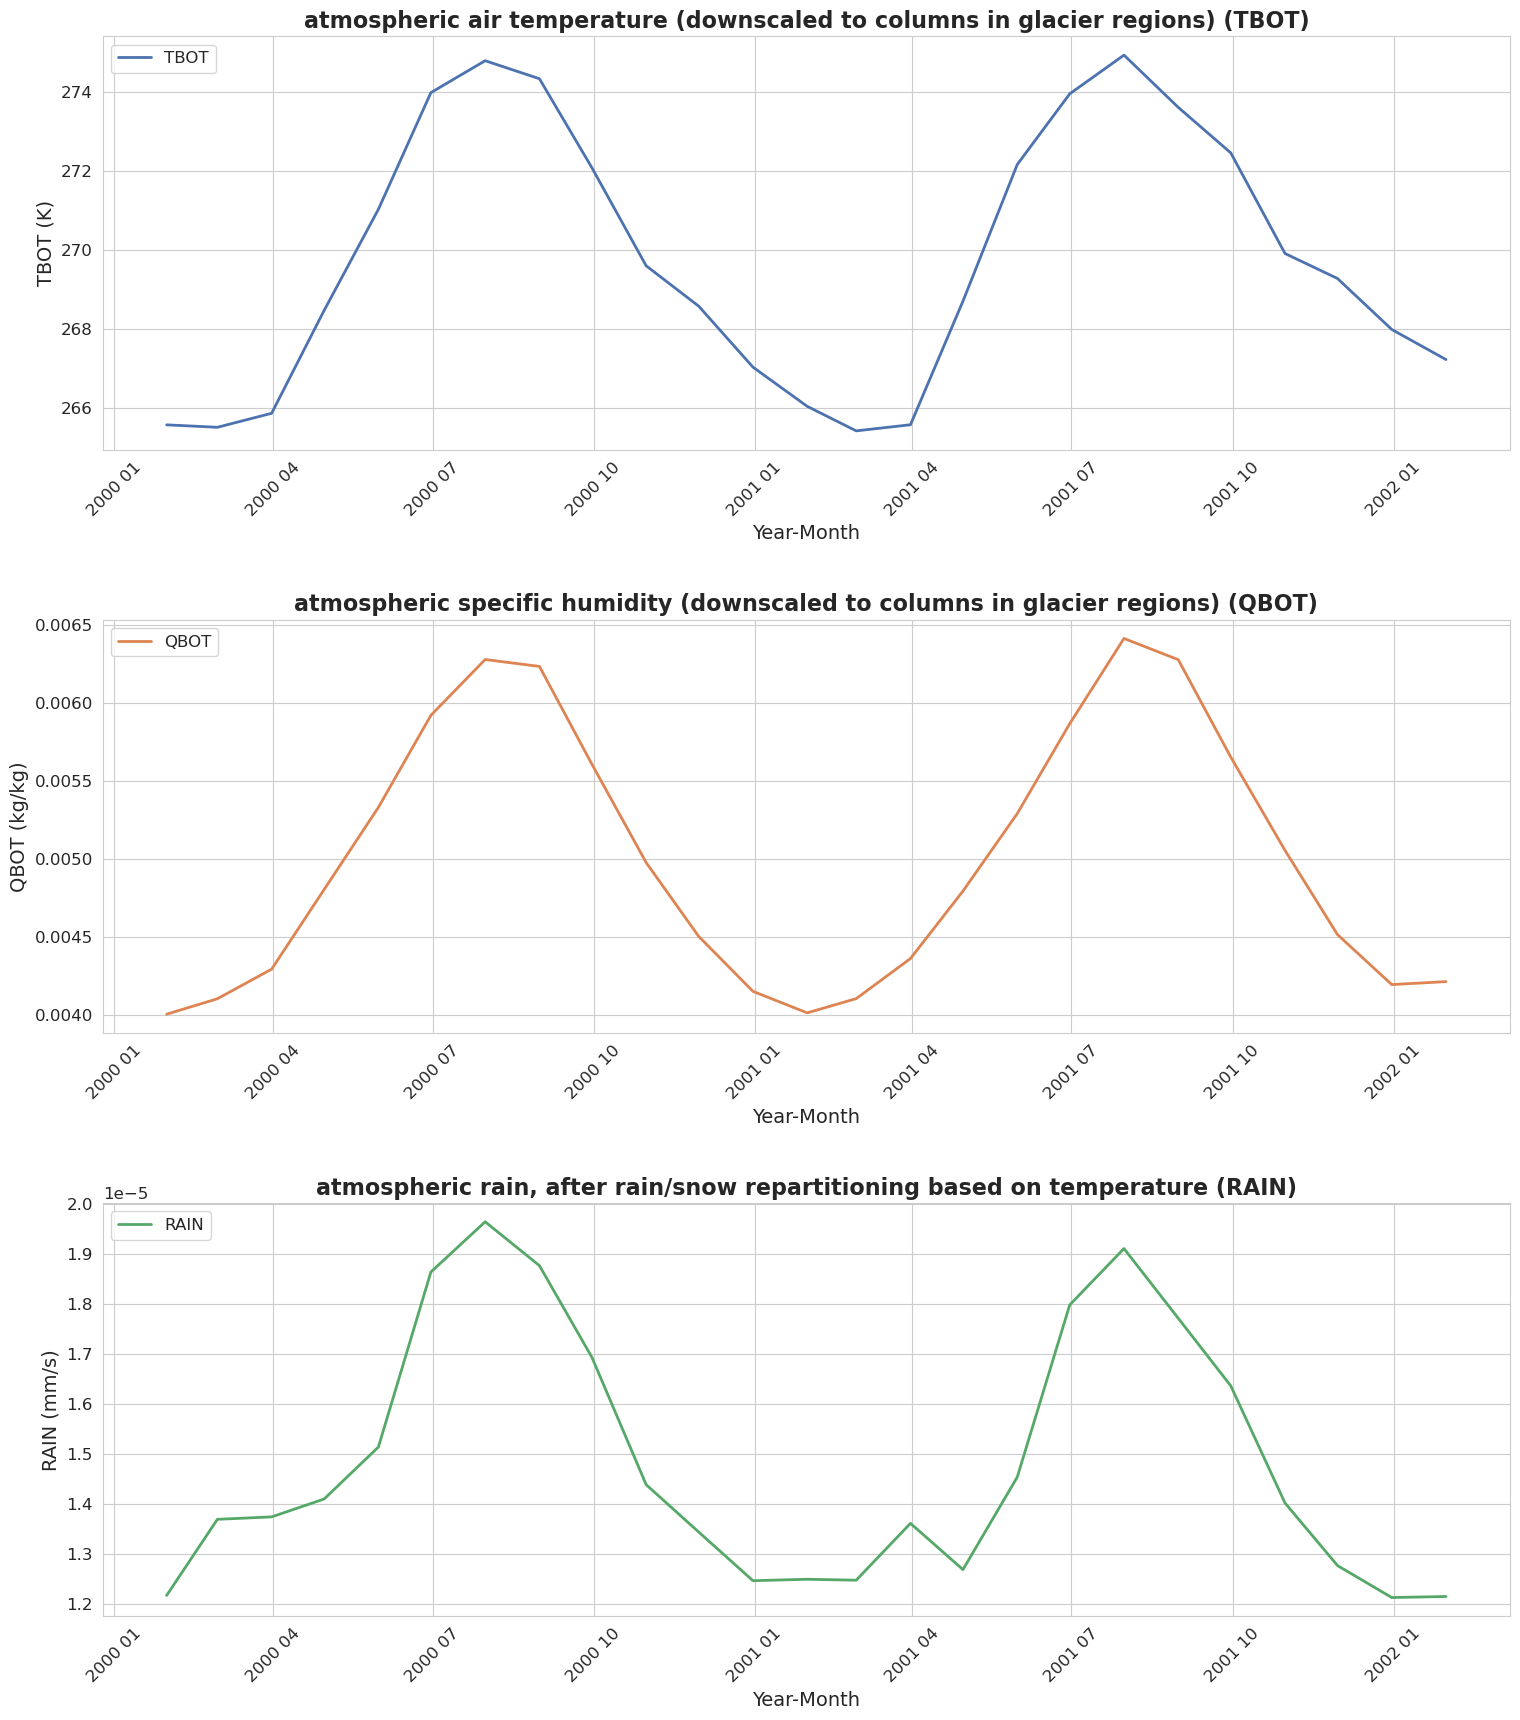

In [12]:
# Styling
sns.set_style("whitegrid")  # Use seaborn's whitegrid style
plt.rcParams['font.size'] = 12  # Increase default font size

# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

variables = ['TBOT', 'QBOT', 'RAIN']
colors = sns.color_palette("deep", 3)  # A palette of 3 distinct colors

for ax, var, color in zip(axes, variables, colors):
    ax.plot(monthly_avg['time'], monthly_avg[var], label=var, color=color, linewidth=2)

    ax.set_xlabel('Year-Month', fontsize=14)
    ax.set_ylabel(f'{var} ({ds[var].attrs.get("units", "unknown units")})', fontsize=14)  # Retrieving units from dataset attributes

    # Fetching long_name from attributes and forming the title
    long_name = ds[var].attrs.get('long_name', var)  # Using var as default if long_name is absent
    ax.set_title(f'{long_name} ({var})', fontsize=16, fontweight='bold')

    ax.legend(loc='upper left')

    # Format x-axis to show dates in "YYYY MM" format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Set tick every 3 months
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout(pad=3)  # Adjust padding
plt.show()


# Summer and Winter Results
    # https://docs.xarray.dev/en/stable/examples/monthly-means.html


In [13]:
ds

<xarray.Dataset>
Dimensions:                (levgrnd: 25, levlak: 10, levdcmp: 1, time: 17521,
                            hist_interval: 2, lon: 288, lat: 192, levsoi: 20)
Coordinates:
  * levgrnd                (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak                 (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                (levdcmp) float32 1.0
  * time                   (time) datetime64[ns] 2000-01-01 ... 2002-01-01
  * lon                    (lon) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lat                    (lat) float32 -90.0 -89.06 -88.12 ... 89.06 90.0
Dimensions without coordinates: hist_interval, levsoi
Data variables: (12/38)
    mcdate                 (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    mcsec                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    mdcur                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    mscur                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    nstep                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    time_bounds            (time, hist_interval) object dask.array<chunksize=(24, 2), meta=np.ndarray>
    ...                     ...
    SOILLIQ                (time, levsoi, lat, lon) float32 dask.array<chunksize=(24, 20, 192, 288), meta=np.ndarray>
    TBOT                   (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
    TG                     (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
    TRAFFICFLUX            (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
    WASTEHEAT              (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
    WIND                   (time, lat, lon) float32 dask.array<chunksize=(24, 192, 288), meta=np.ndarray>
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 10/14/23 20:56:35
    source:                                    Community Terrestrial Systems ...
    hostname:                                  JohnnyThinkStation
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          hour_1
    Time_constant_3Dvars_filename:             ./i.e21.I2000Clm50SpGs.f09_g17...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

In [14]:
# Testing Code to Separate Northern and Southern Hemispheres
northern = ds.sel(lat=slice(0, 90))  # Northern Hemisphere (0 to 90 degrees North)
southern = ds.sel(lat=slice(-90, 0))  # Southern Hemisphere (-90 to 0 degrees North)


In [15]:
(northern["QBOT"])

<xarray.DataArray 'QBOT' (time: 17521, lat: 96, lon: 288)>
dask.array<getitem, shape=(17521, 96, 288), dtype=float32, chunksize=(24, 96, 288), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T01:00:00 ... 2002-01-01
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 0.4712 1.414 2.356 3.298 ... 87.17 88.12 89.06 90.0
Attributes:
    long_name:     atmospheric specific humidity (downscaled to columns in gl...
    units:         kg/kg
    cell_methods:  time: mean

In [16]:
(southern["QBOT"])

<xarray.DataArray 'QBOT' (time: 17521, lat: 96, lon: 288)>
dask.array<getitem, shape=(17521, 96, 288), dtype=float32, chunksize=(24, 96, 288), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T01:00:00 ... 2002-01-01
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... -2.356 -1.414 -0.4712
Attributes:
    long_name:     atmospheric specific humidity (downscaled to columns in gl...
    units:         kg/kg
    cell_methods:  time: mean

In [17]:
ds['QBOT'].time

<xarray.DataArray 'time' (time: 17521)>
array(['2000-01-01T00:00:00.000000000', '2000-01-01T01:00:00.000000000',
       '2000-01-01T02:00:00.000000000', ..., '2001-12-31T22:00:01.000000000',
       '2001-12-31T22:59:58.000000000', '2002-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T01:00:00 ... 2002-01-01

In [18]:
# testing code to Extract Summer Months
northern_summer = northern.sel(time=northern['time.season'] == 'JJA')
southern_summer = southern.sel(time=southern['time.season'] == 'DJF')

In [19]:
southern_summer

<xarray.Dataset>
Dimensions:                (levgrnd: 25, levlak: 10, levdcmp: 1, time: 4321,
                            hist_interval: 2, lon: 288, lat: 96, levsoi: 20)
Coordinates:
  * levgrnd                (levgrnd) float32 0.01 0.04 0.09 ... 19.48 28.87 42.0
  * levlak                 (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                (levdcmp) float32 1.0
  * time                   (time) datetime64[ns] 2000-01-01 ... 2002-01-01
  * lon                    (lon) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lat                    (lat) float32 -90.0 -89.06 -88.12 ... -1.414 -0.4712
Dimensions without coordinates: hist_interval, levsoi
Data variables: (12/38)
    mcdate                 (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    mcsec                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    mdcur                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    mscur                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    nstep                  (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    time_bounds            (time, hist_interval) object dask.array<chunksize=(24, 2), meta=np.ndarray>
    ...                     ...
    SOILLIQ                (time, levsoi, lat, lon) float32 dask.array<chunksize=(24, 20, 96, 288), meta=np.ndarray>
    TBOT                   (time, lat, lon) float32 dask.array<chunksize=(24, 96, 288), meta=np.ndarray>
    TG                     (time, lat, lon) float32 dask.array<chunksize=(24, 96, 288), meta=np.ndarray>
    TRAFFICFLUX            (time, lat, lon) float32 dask.array<chunksize=(24, 96, 288), meta=np.ndarray>
    WASTEHEAT              (time, lat, lon) float32 dask.array<chunksize=(24, 96, 288), meta=np.ndarray>
    WIND                   (time, lat, lon) float32 dask.array<chunksize=(24, 96, 288), meta=np.ndarray>
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 10/14/23 20:56:35
    source:                                    Community Terrestrial Systems ...
    hostname:                                  JohnnyThinkStation
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          hour_1
    Time_constant_3Dvars_filename:             ./i.e21.I2000Clm50SpGs.f09_g17...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

In [20]:
northern["time.season"]

<xarray.DataArray 'season' (time: 17521)>
array(['DJF', 'DJF', 'DJF', ..., 'DJF', 'DJF', 'DJF'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-01T01:00:00 ... 2002-01-01

In [21]:
# Filter dataset by the year 2000
ds_2000 = ds.sel(time='2000')

# Separate Northern and Southern Hemispheres
northern = ds_2000.sel(lat=slice(0, 90))  # Northern Hemisphere (0 to 90 degrees North)
southern = ds_2000.sel(lat=slice(-90, 0))  # Southern Hemisphere (-90 to 0 degrees North)

# Define seasons
seasons = {
    'summer': {'nh': 'JJA', 'sh': 'DJF'},
    'winter': {'nh': 'DJF', 'sh': 'JJA'}
}

seasonal_means = {}  # To store computed means for each season and variable

for season_name, season_months in seasons.items():
    northern_season = northern.sel(time=northern['time.season'] == season_months['nh'])
    southern_season = southern.sel(time=southern['time.season'] == season_months['sh'])

    northern_season_mean = northern_season.mean(dim='time').compute()
    southern_season_mean = southern_season.mean(dim='time').compute()

    combined_season_mean = xr.concat([southern_season_mean, northern_season_mean], dim='lat')
    seasonal_means[season_name] = combined_season_mean  # Store in the dictionary



In [22]:
# Get global min and max for each variable across both seasons
scale_limits = {}
for var in ['TBOT', 'QBOT', 'RAIN']:
    combined_data = xr.concat([seasonal_means['summer'][var], seasonal_means['winter'][var]], dim='time')
    scale_limits[var] = {'vmin': combined_data.min(), 'vmax': combined_data.max()}

    # Convert Dask-backed values to scalars
    scale_limits[var]['vmin'] = float(scale_limits[var]['vmin'].compute())
    scale_limits[var]['vmax'] = float(scale_limits[var]['vmax'].compute())


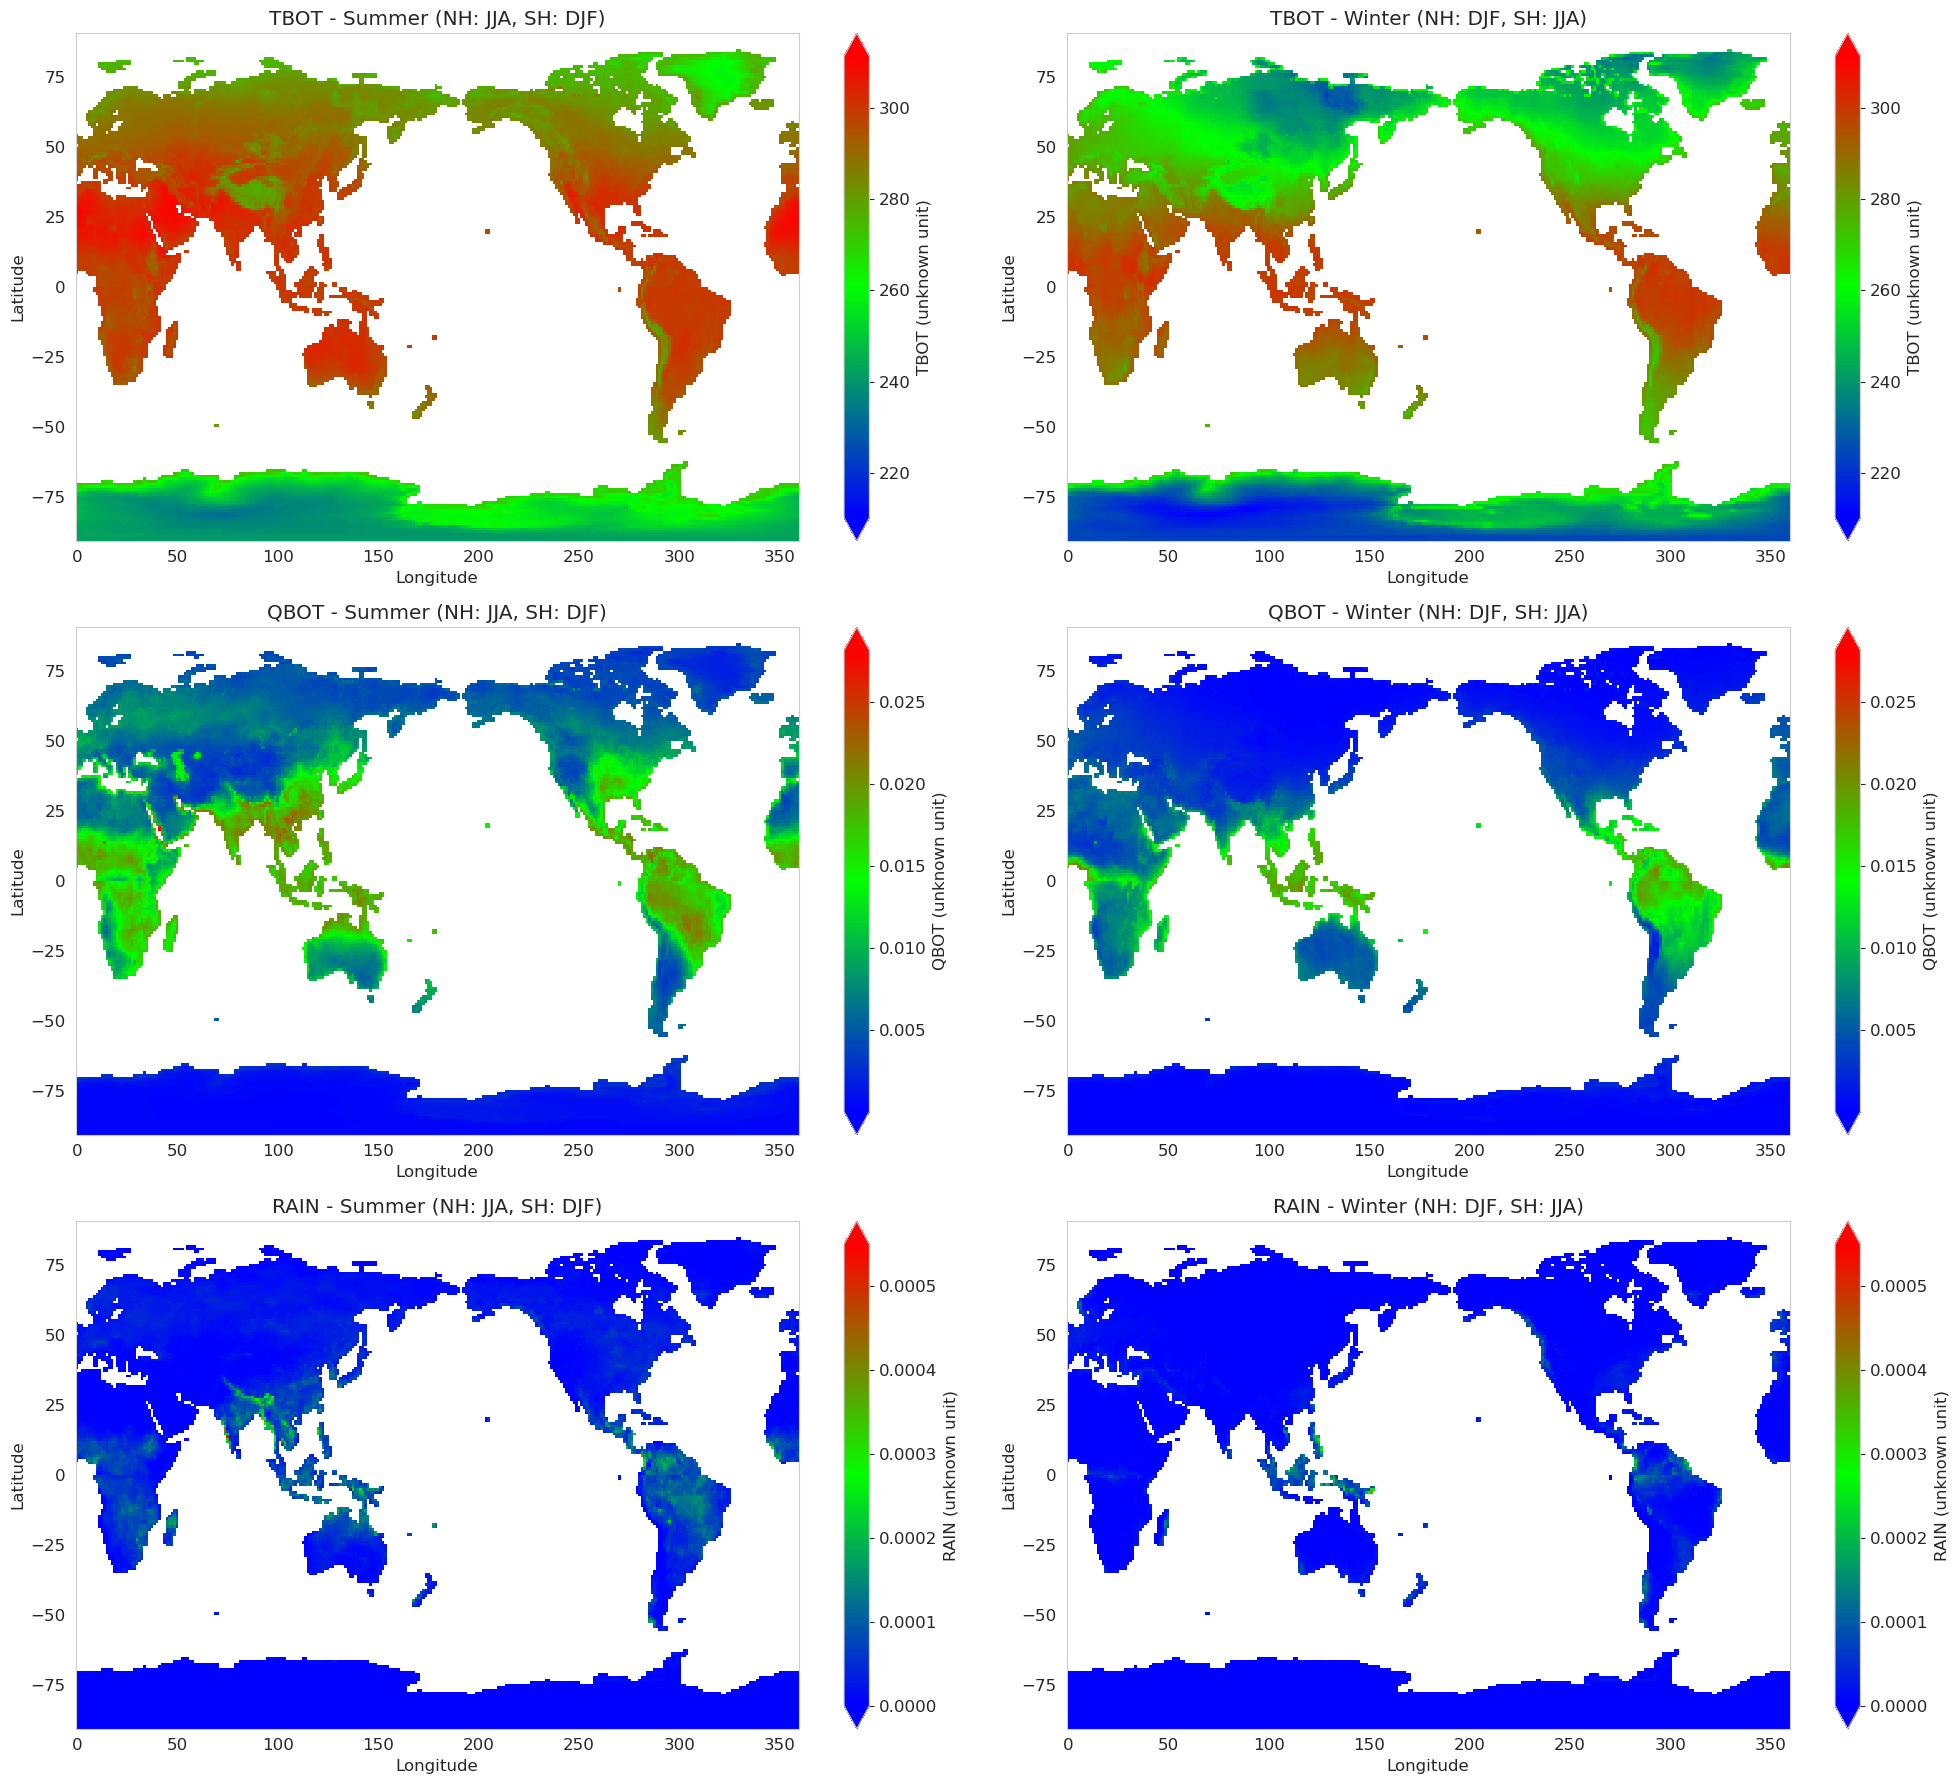

In [23]:
import numpy as np
import matplotlib.colors as mcolors

# Custom colormap: Blue-Green-Red
colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]  # B -> G -> R
n_bins = [3]  # Discretizes the interpolation into bins
cmap_name = 'custom_div_cmap'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

variables = ['TBOT', 'QBOT', 'RAIN']

fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(20, 18))  # len(variables) rows, 2 seasons

for season_name, season_months in seasons.items():
    col = 0 if season_name == 'summer' else 1  # Summer in first column, Winter in second column

    for idx, var in enumerate(variables):
        ax = axes[idx, col]  # Get appropriate axis using the index

        data = seasonal_means[season_name][var]  # Fetch pre-computed data
        unit = data.attrs.get('units', 'unknown unit')

        p = data.plot(ax=ax, vmin=scale_limits[var]['vmin'], vmax=scale_limits[var]['vmax'], cmap=cm, add_colorbar=True, extend='both')
        p.colorbar.set_label(f"{var} ({unit})")

        # Other visual enhancements
        ax.set_title(f'{var} - {season_name.capitalize()} (NH: {season_months["nh"]}, SH: {season_months["sh"]})')
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()


